# 画像の幾何変換
## 目的
* 並進，回転，アフィン変換といった幾何変換を学ぶ．
* 次の関数の使い方を学ぶ: <A HREF="http://docs.opencv.org/3.0-beta/modules/imgproc/doc/geometric_transformations.html?highlight=cv2.getper#cv2.getPerspectiveTransform" target="_blank">cv2.getPerspectiveTransform</A>


## 変換
OpenCVは2つの変換関数<A HREF="http://docs.opencv.org/3.0-beta/modules/imgproc/doc/geometric_transformations.html?highlight=cv2.warpaffine#cv2.warpAffine" tareget="_blank">cv2.warpAffine</A> と <A HREF="http://docs.opencv.org/3.0-beta/modules/imgproc/doc/geometric_transformations.html?highlight=cv2.warp#cv2.warpPerspective" target="_blank" >cv2.warpPerspective </A>を提供している． `cv2.warpAffine` は2x3の変換行列を入力するのに対して cv2.warpPerspective は3x3の変換行列を入力とする．

## スケーリング(拡大・縮小)
スケーリングは画像のサイズ変更のみを行う．この変換のために <A HREF="http://docs.opencv.org/3.0-beta/modules/imgproc/doc/geometric_transformations.html?highlight=cv2.resize#cv2.resize" target="_blank"> cv2.resize() </A>関数が用意されている．変更後の画像サイズもしくは縮尺を指定する必要がある．補間方法には複数あるが，縮小には`cv2.INTER_AREA` ，拡大には `cv2.INTER_CUBIC` (処理が遅い) や `cv2.INTER_LINEAR` が適している．デフォルトｎの補間方法は `cv2.INTER_LINEAR` である．以下に示すいずれかの方法を使ってスケーリングができる （<A HREF="http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/py_tutorials/py_imgproc/py_geometric_transformations/messi5.jpg">対象画像</A>）:

In [4]:
import cv2
import numpy as np

img = cv2.imread('messi5.jpg')

res = cv2.resize(img,None,fx=2, fy=2, interpolation = cv2.INTER_CUBIC)

#OR
# height, width = img.shape[:2]
# res = cv2.resize(img,(2*width, 2*height), interpolation = cv2.INTER_CUBIC)


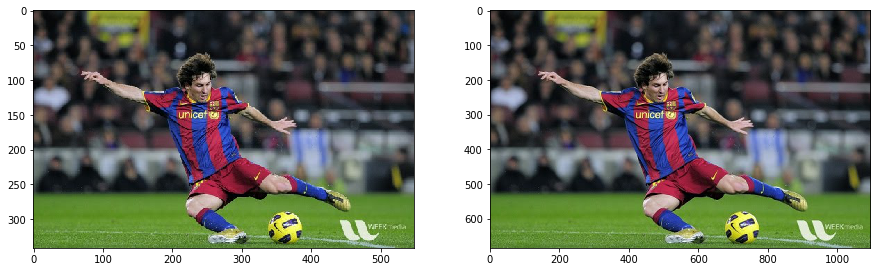

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
res=cv2.cvtColor(res,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(res)
plt.show()

## 並進
並進は物体の位置を移動させる処理である．$(x,y)$方向への移動量が $(t_x,t_y)$ であるとすれば，この並進を表す変換行列 $\boldsymbol{M}$ は以下のようになる:

$\boldsymbol{M} = \begin{bmatrix} 1 & 0 & t_x \\ 0 & 1 & t_y  \end{bmatrix}$

データ型が `np.float32` のNumpyの配列に値を設定し， `cv2.warpAffine(img,M,Size)` 関数に与える．次の例では移動量を $(100,50)$ としている(<A HREF="http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/py_tutorials/py_imgproc/py_geometric_transformations/messi5.jpg">対象画像</A>):



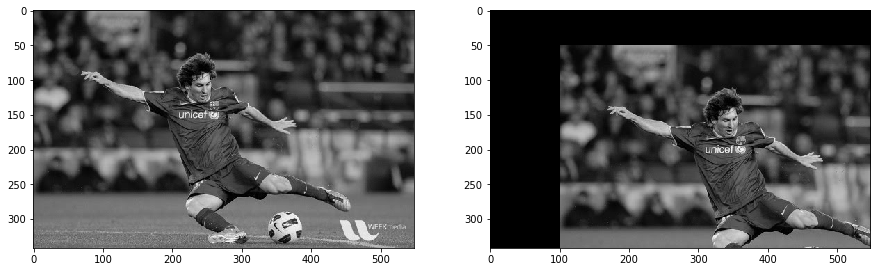

In [7]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('messi5.jpg',0)
rows,cols = img.shape

M = np.float32([[1,0,100],[0,1,50]])
dst = cv2.warpAffine(img,M,(cols,rows))

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(dst,cmap='gray')
plt.show()


<font color="red">Warning</font>: `cv2.warpAffine(img,M,Size)` 関数の第3引数Sizeには出力画像のサイズを `(width, height)` という形式で指定しなければならない。ここで`width`は列の数，`height`は行の数である．

## 回転
画像を $\theta$ラジアン回転させるための変換行列は次である．

$\boldsymbol{M} = \begin{bmatrix} cos\theta & -sin\theta \\ sin\theta & cos\theta   \end{bmatrix}$

OpenCVが提供する回転は拡大縮小(スケーリング)も同時に行い，回転の中心位置も変更できる．回転変換を表す変換行列は以下のようになる．

$\begin{bmatrix} \alpha &  \beta & (1- \alpha )  \cdot \textrm{center}.x -  \beta \cdot \textrm{center}.y \\ - \beta &  \alpha &  \beta \cdot \textrm{center}.x + (1- \alpha )  \cdot \textrm{center}.y \end{bmatrix}$

ここで `center.x`と`center.y`は回転中心の座標、`scale`は拡大率で、$\alpha$と$\beta$は以下:

$\begin{array}{l} \alpha =  scale \cdot \cos \theta , \\ \beta =  scale \cdot \sin \theta \end{array}$

この変換行列を計算するために `cv2.getRotationMatrix2D` 関数が用意されている．次の例はスケーリングをせずに画像中心に対して90度回転する変換を行う(<A HREF="http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/py_tutorials/py_imgproc/py_geometric_transformations/messi5.jpg">対象画像</A>) :

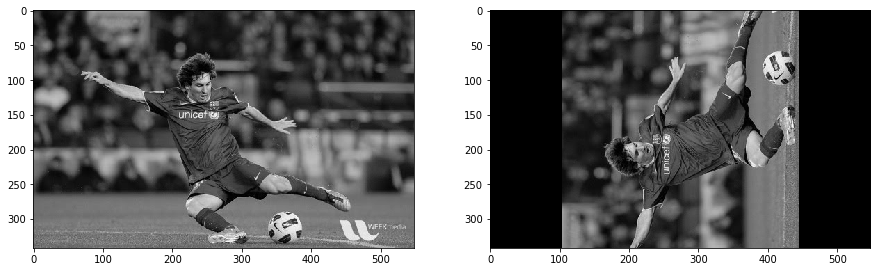

In [8]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('messi5.jpg',0)
rows,cols = img.shape

M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)
dst = cv2.warpAffine(img,M,(cols,rows))

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(dst,cmap='gray')
plt.show()

## アフィン変換
アフィン変換においては、元画像で並行な直線はみな、変換後の画像においても並行性が保れるという性質がある．変換行列を計算するには、入力画像と出力画像の対応点の座標が少なくとも3組必要である．`cv2.getAffineTransform` 関数を使い2x3の変換行列を作成し， それを`cv2.warpAffine` 関数に与えて画像を変換する．

次のコードは3組の対応点(入力，出力画像上で緑色の円で表示)を指定したアフィン変換の例である (<A HREF="http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/py_tutorials/py_imgproc/py_geometric_transformations/drawing.png">対象画像</A>): 

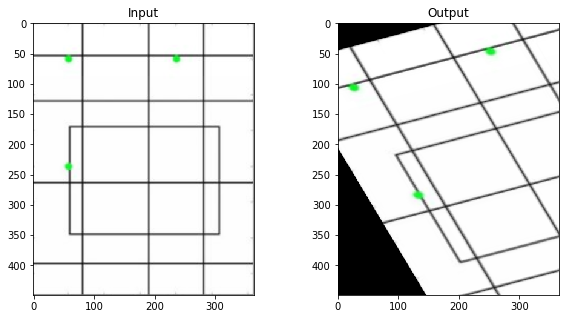

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np

img = cv2.imread('drawing.png')
rows,cols,ch = img.shape

pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])

M = cv2.getAffineTransform(pts1,pts2)
dst = cv2.warpAffine(img,M,(cols,rows))

plt.figure(figsize=(10,5))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

## 射影変換
射影変換は3x3の変換行列が必要である．変換の前後で直線性が保たれる．変換行列を計算するには少なくとも4組の対応点の座標が必要で、しかもこれら4点のどの3点をとっても同一の直線上に乗らないよう選ぶ必要がある． `cv2.getPerspectiveTransform` 関数を使って変換行列を計算し， `cv2.warpPerspective` 関数を使って画像を変形する．

次のコードを見てみよう (<A HREF="http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/py_tutorials/py_imgproc/py_geometric_transformations/sudokusmall.png">使用した画像</A>):

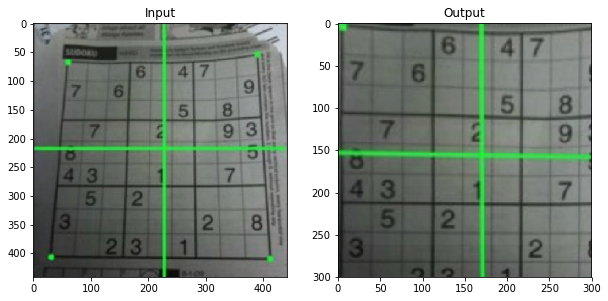

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np

img = cv2.imread('sudokusmall.png')
rows,cols,ch = img.shape

pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])

M = cv2.getPerspectiveTransform(pts1,pts2)

dst = cv2.warpPerspective(img,M,(300,300))

plt.figure(figsize=(10,5))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

## 補足資料
* [Richard Szeliski (2009)“Computer Vision: Algorithms and Applications](http://szeliski.org/Book/drafts/SzeliskiBook_20100903_draft.pdf)
* [白井のコンピュータビジョンのメモ書き:幾何変換](http://lang.sist.chukyo-u.ac.jp/Classes/ComputerVision/Transformation.html)
* 応用例 [名刺の読み込み](http://lang.sist.chukyo-u.ac.jp/Classes/ComputerVision/OCR.html)

## 目次
* [最初に戻る]( http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/Notebook/usingOpenCV.html )
* 一つ上: OpenCVを使った画像処理<BR>
OpenCVが提供する様々な画像処理の関数について学ぶ
* 前の学習項目 [色空間の変換 colorSpaces.ipynb ](http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/Notebook/imageArithmetics.html)<BR>
画像を別の色空間へ変換する方法を学ぶ. また，動画中で特定の色を持つ物体の追跡方法を学ぶ
* 次の学習項目<BR>
[画像の閾値値処理 thresholding.ipynb ]( http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/Notebook/thresholding.html )<BR>
画像の二値化(大局的閾値，適応的閾値，大津の二値化)を学ぶ．